# <b> SOCIAL BUZZ PROJECT

### Problem Statement  
Social Buzz, a rapidly scaling social media platform with over 500 million monthly active users, faces challenges in managing their vast amounts of unstructured data, preparing for an IPO, and adopting big data best practices. With a small team and limited experience in scaling operations to this magnitude, they require external expertise to streamline their data processes, ensure a smooth IPO, and uncover insights from their content data.

### Objective  
The project aims to:  
1. Conduct a comprehensive audit of Social Buzz's big data practices.  
2. Provide actionable recommendations to support their upcoming IPO.  
3. Analyze and identify the top 5 content categories with the highest aggregate popularity.  
4. Deliver detailed insights and documentation to guide Social Buzz through scaling challenges and data best practices.

In [3]:
# Importing Necessary Library
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

### Content Dataset

In [5]:
# loading the content data set
content = pd.read_csv('Content.csv')
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [6]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [7]:
#  Dropping the unneccesary columns
content.drop(['Unnamed: 0','URL','User ID'], axis=1, inplace=True)

In [8]:
# Checking for null values
content.isna().mean()*100

Content ID    0.0
Type          0.0
Category      0.0
dtype: float64

#### There are no null values

In [10]:
# Checking the type column
content.Type.value_counts()

Type
photo    261
video    259
GIF      244
audio    236
Name: count, dtype: int64

In [11]:
# Checking the category column
content.Category.value_counts()

Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

#### Need to manipulate Category column

In [13]:
#  Maniplulating Category column
content.Category = content.Category.apply(lambda x: x.strip('"').title())

In [14]:
# checking category column again to ensure changes
content.Category.value_counts()

Category
Technology         73
Animals            72
Travel             69
Science            68
Culture            67
Fitness            66
Food               64
Soccer             64
Healthy Eating     62
Cooking            61
Tennis             59
Education          59
Studying           58
Dogs               58
Public Speaking    50
Veganism           50
Name: count, dtype: int64

In [15]:
# changing the column name
content.columns = ['Content ID','Content_Type','Category']

In [16]:
content.head()

,Content ID,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,Healthy Eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,Healthy Eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,Technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,Food


### Reaction Dataset

In [18]:
# Loading the Dataset
reaction = pd.read_csv('Reactions.csv')
reaction.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [19]:
# dropping unnecessary columns
reaction.drop(['Unnamed: 0','User ID'],axis=1,inplace=True)

In [20]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    25553 non-null  object
dtypes: object(3)
memory usage: 599.0+ KB


In [21]:
# checking for null values
reaction.isna().mean()*100

Content ID    0.000000
Type          3.835166
Datetime      0.000000
dtype: float64

In [22]:
# Dropping the rows with Null value
reaction = reaction[~(reaction.Type.isna())]

In [23]:
# checking for null values
reaction.isna().mean()*100

Content ID    0.0
Type          0.0
Datetime      0.0
dtype: float64

In [24]:
#  Checking Type column
reaction.Type.value_counts()

Type
heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: count, dtype: int64

In [25]:
# Changing the column name
reaction.columns = ['Content ID', 'Reaction_Type', 'Datetime']

In [26]:
reaction.head()

,Content ID,Reaction_Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


### ReactionTypes Dataset

In [28]:
# Loading the dataset
reactiontype = pd.read_csv('ReactionTypes.csv')
reactiontype.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [29]:
# Dropping unnecessary column
reactiontype.drop(['Unnamed: 0'],axis=1,inplace=True)

In [30]:
reactiontype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes


In [31]:
reactiontype

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [32]:
# def func(x):
#     if x == 'positive':
#         return 1
#     elif x == 'negative':
#         return -1
#     else:
#         return 0
# reactiontype.Sentiment =  reactiontype.Sentiment.apply(func) 

In [33]:
# reactiontype['scoreImpact'] = reactiontype.Sentiment * reactiontype.Score

In [34]:
# changing the column name
reactiontype.columns = ['Reaction_Type', 'Sentiment', 'Score']

## Joining the dataset

In [36]:
df = pd.merge(reaction , content , how='left' , on= 'Content ID')
df.head()

,Content ID,Reaction_Type,Datetime,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying


In [37]:
data = pd.merge(df,reactiontype, how='left' , on= 'Reaction_Type') 

In [38]:
data.head()

,Content ID,Reaction_Type,Datetime,Content_Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30


In [39]:
data.isna().sum()

Content ID       0
Reaction_Type    0
Datetime         0
Content_Type     0
Category         0
Sentiment        0
Score            0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction_Type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content_Type   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [41]:
data.head()

,Content ID,Reaction_Type,Datetime,Content_Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30


In [42]:
df = data.groupby(['Category']).sum()['Score']
# data.groupby(['Category']).sum()['Score'].sort_values().tail()

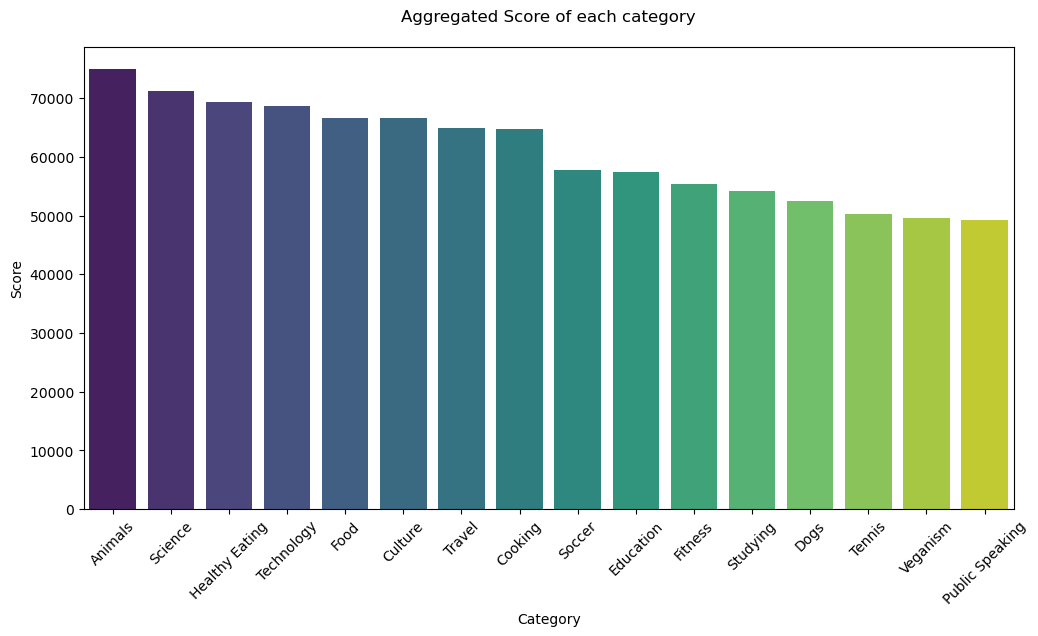

In [43]:
plt.figure(figsize=[12,6])
sns.barplot(df.sort_values(ascending=False) , palette='viridis')
plt.xticks(rotation=45)
plt.title('Aggregated Score of each category\n')
plt.show()

In [44]:
top_5_categories = df.sort_values(ascending=False).head(5).index
top_5_categories

Index(['Animals', 'Science', 'Healthy Eating', 'Technology', 'Food'], dtype='object', name='Category')

In [45]:
df = data.groupby('Category').count()['Datetime']

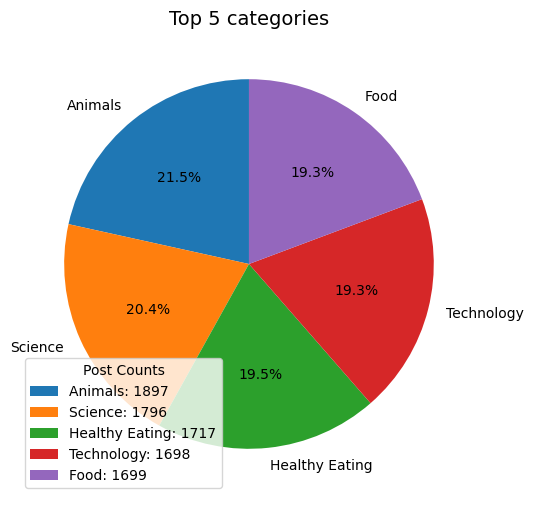

In [46]:
# Example data
categories = top_5_categories
counts = df[top_5_categories]

# Create the pie chart
plt.figure(figsize=(12, 6))  # Optional: Adjust the size of the chart
plt.pie(
    counts,
    labels=categories,
    autopct='%1.1f%%',  # Show percentages on the chart
    startangle=90,      # Start from 90 degrees for better visual balance
    textprops={'fontsize': 10}  # Font size for labels
)

# Add a legend to show counts
plt.legend(
    loc='lower left',
    labels=[f'{cat}: {count}' for cat, count in zip(categories, counts)],
    title="Post Counts"
)

# Add a title
plt.title("Top 5 categories", fontsize=14)

# Display the chart
plt.show()


In [47]:
data.head()

,Content ID,Reaction_Type,Datetime,Content_Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30


In [48]:
# Adding month column
data['month'] = pd.DatetimeIndex(data['Datetime']).month

In [49]:
data.head()

,Content ID,Reaction_Type,Datetime,Content_Type,Category,Sentiment,Score,month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0,11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10,6
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15,4
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0,1
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30,8


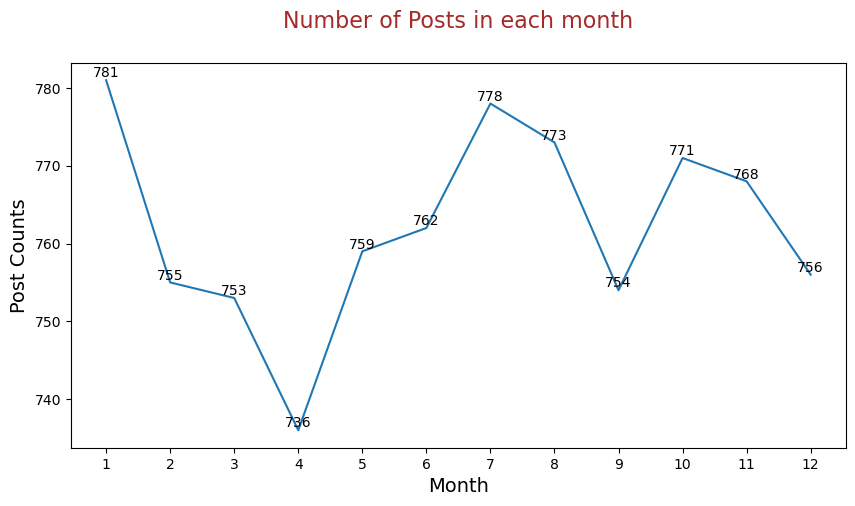

In [50]:
df = data.groupby(['month']).nunique()['Content ID'].sort_index()
plt.figure(figsize=[10,5])
ax = sns.lineplot(df,markers='o')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Number of Posts in each month\n',fontdict = {'size':16 , 'color':'brown'})
plt.xlabel('Month',fontdict = {'size':14})
plt.ylabel('Post Counts',fontdict = {'size':14})

for x, y in zip(df.index, df.values):
    ax.text(x, y, f'{y}', color='black', fontsize=10, ha='center', va='bottom')

plt.show()


In [51]:
top_5_categories

Index(['Animals', 'Science', 'Healthy Eating', 'Technology', 'Food'], dtype='object', name='Category')

In [52]:
data.groupby(['Category']).count()['Content ID'][top_5_categories]
# data.groupby(['Category','Reaction_Type']).count()['Content ID'][top_5_categories]

Category
Animals           1897
Science           1796
Healthy Eating    1717
Technology        1698
Food              1699
Name: Content ID, dtype: int64

In [53]:
df = pd.DataFrame(data.groupby(['Category']).count()['Content ID'][top_5_categories])
df = df.reset_index()

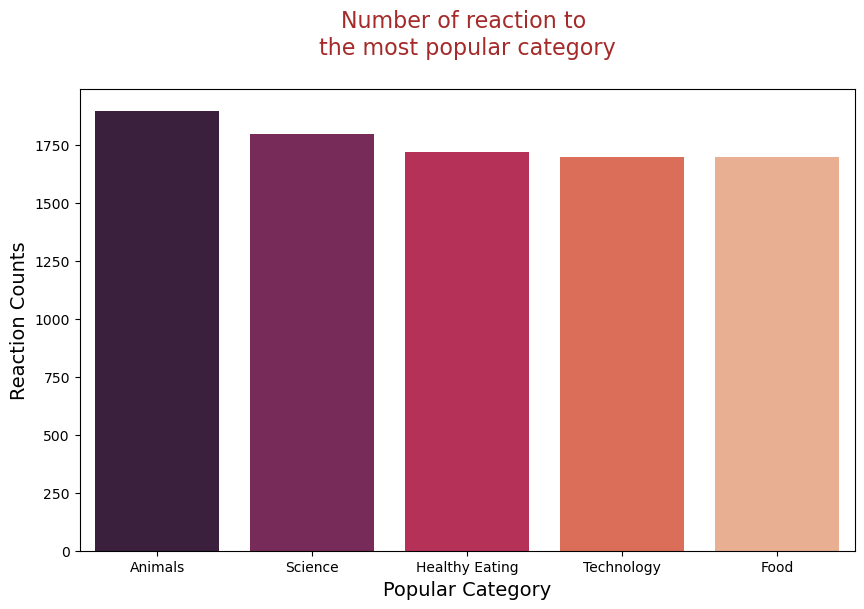

In [54]:
plt.figure(figsize=[10,6])
sns.barplot(data=df,x=df.Category,y=df['Content ID'],palette='rocket')
plt.xlabel('Popular Category',fontdict = {'size':14})
plt.ylabel('Reaction Counts',fontdict = {'size':14})
plt.title('Number of reaction to \nthe most popular category\n',fontdict = {'size':16 , 'color':'brown'})
plt.show()

In [55]:
df = pd.DataFrame(data.groupby(['Category','Content_Type']).count()['Content ID'][top_5_categories])
df

Content ID
Category       Content_Type            
Animals        GIF                  342
               audio                570
               photo                674
               video                311
Science        GIF                  368
               audio                369
               photo                515
               video                544
Healthy Eating GIF                  390
               audio                503
               photo                332
               video                492
Technology     GIF                  501
               audio                556
               photo                415
               video                226
Food           GIF                  444
               audio                401
               photo                364
               video                490

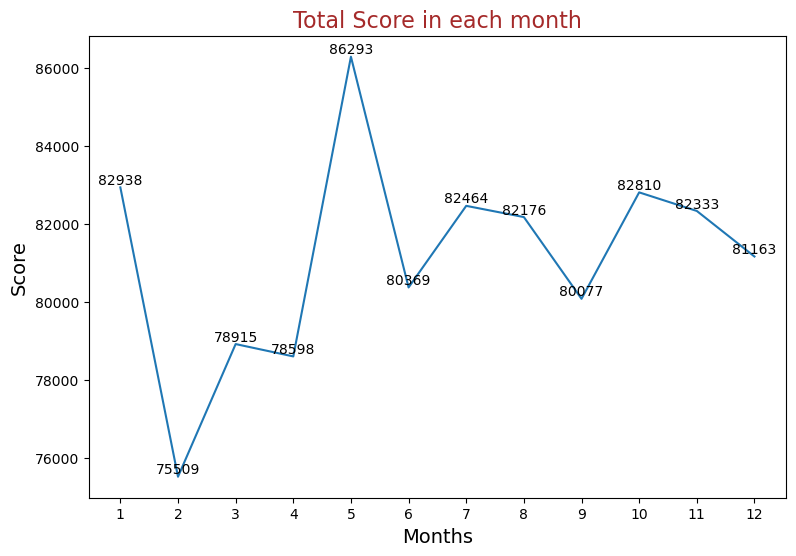

In [56]:
df = data.groupby('month').sum()['Score'].sort_index()
plt.figure(figsize=[9,6])
ax = sns.lineplot(df,markers='o')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylabel('Score',fontdict = {'size':14})
plt.xlabel('Months',fontdict = {'size':14})
plt.title('Total Score in each month',fontdict = {'size':16 , 'color':'brown'})
for x, y in zip(df.index, df.values):
    ax.text(x, y, f'{y}', color='black', fontsize=10, ha='center', va='bottom')

plt.show()